# Data Cleaning and Feature Selection
In this notebook, we will focus on preparing a dataset for analysis by cleaning and selecting relevant features.
Data cleaning is an essential step to ensure data quality, removing any inconsistencies, missing values, and outliers that may negatively impact the model's performance. Feature selection helps to reduce the dimensionality of the data by identifying the most informative variables, improving computational efficiency and potentially enhancing model accuracy.

## Steps Covered:
   1. **Data Loading**: Import the dataset and perform an initial inspection.
   2. **Data Cleaning**: Identify and handle missing values, outliers, and any inconsistencies.




By following these steps, we aim to improve the dataset's quality and structure, making it more suitable for machine learning models.

### 1. Data loading

In [1]:
import pandas as pd

df = pd.read_csv("../datasets/players20.csv", encoding='latin1')

### 2. Data cleaning
In the first step, we will view the head of the dataframe.

In [2]:
df.head()

,Team,Player,#,Class,Pos,Height,Weight,Hometown,High School,Summary,...,BLK%,TOV%,USG%,OWS,DWS,WS,WS/40,OBPM,DBPM,BPM
0,Youngstown State Penguins,Darius Quisenberry,3.0,SO,G,1-Shahrivar,186.0,"Springfield, OH",Huber Heights Wayne HS,"16.7 Pts, 3.7 Reb, 4.1 Ast",...,0.2,14.4,28.3,2.7,0.9,3.7,0.156,2.9,-1.6,1.3
1,Youngstown State Penguins,NaNz Bohannon,33.0,JR,F,6-Shahrivar,230.0,"Lorain, OH",Lorain High School,"11.1 Pts, 8.8 Reb, 2.4 Ast",...,0.6,19.0,19.2,1.9,0.8,2.7,0.111,0.2,0.0,0.2
2,Youngstown State Penguins,Michael Akuchie,31.0,JR,F,8-Shahrivar,212.0,"Plantation, FL",St. Thomas AquiNaNs High School,"9.1 Pts, 6.2 Reb, 0.6 Ast",...,2.9,9.4,18.0,1.7,1.0,2.7,0.139,1.0,-0.3,0.7
3,Youngstown State Penguins,Garrett Covington,32.0,JR,G,5-Shahrivar,216.0,"Carmel, IN",Carmel High School,"8.0 Pts, 3.7 Reb, 0.8 Ast",...,0.5,13.4,18.6,0.7,0.4,1.2,0.063,-2.4,-2.1,-4.6
4,Youngstown State Penguins,Donel Cathcart III,13.0,SR,G,5-Shahrivar,190.0,"Buffalo, NY",CardiNaNl O'Hara HS,"7.1 Pts, 3.1 Reb, 1.2 Ast",...,0.9,13.6,18.2,0.9,0.5,1.4,0.085,-1.2,-1.9,-3.1


Then, we will check the shape of the dataframe.

In [3]:
df.shape

(5452, 57)

Then we will check the information about the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5452 entries, 0 to 5451
Data columns (total 57 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Team         5452 non-null   object 
 1   Player       5452 non-null   object 
 2   #            5429 non-null   float64
 3   Class        5409 non-null   object 
 4   Pos          5452 non-null   object 
 5   Height       5451 non-null   object 
 6   Weight       5448 non-null   float64
 7   Hometown     5323 non-null   object 
 8   High School  4729 non-null   object 
 9   Summary      4791 non-null   object 
 10  Rk.x         4791 non-null   float64
 11  G            4791 non-null   float64
 12  GS           4791 non-null   float64
 13  MP           4791 non-null   float64
 14  FG           4791 non-null   float64
 15  FGA          4791 non-null   float64
 16  FG%          4626 non-null   float64
 17  2P           4791 non-null   float64
 18  2PA          4791 non-null   float64
 19  2P%   

In [5]:
df.isnull().sum()

Team              0
Player            0
#                23
Class            43
Pos               0
Height            1
Weight            4
Hometown        129
High School     723
Summary         661
Rk.x            661
G               661
GS              661
MP              661
FG              661
FGA             661
FG%             826
2P              661
2PA             661
2P%             963
3P              661
3PA             661
3P%            1450
FT              661
FTA             661
FT%            1256
ORB             661
DRB             661
TRB             661
AST             661
STL             661
BLK             661
TOV             661
PF              661
PTS             661
Rk.y            661
PER             694
TS%             808
eFG%            826
3PAr            826
FTr             826
PProd           694
ORB%            694
DRB%            694
TRB%            694
AST%            694
STL%            694
BLK%            694
TOV%            777
USG%            694


In [6]:
df.describe()

,#,Weight,Rk.x,G,GS,MP,FG,FGA,FG%,2P,...,BLK%,TOV%,USG%,OWS,DWS,WS,WS/40,OBPM,DBPM,BPM
count,5429.000000,5448.000000,4791.000000,4791.000000,4791.000000,4791.000000,4791.000000,4791.000000,4626.000000,4791.000000,...,4758.000000,4675.000000,4758.000000,4791.000000,4791.000000,4791.000000,4758.000000,4791.000000,4791.000000,4791.000000
mean,15.220114,201.455764,7.385723,20.753287,10.460238,421.872052,52.985181,121.059069,0.421408,37.769568,...,1.879445,17.627722,18.630097,0.591463,0.541828,1.135671,0.081142,-1.742601,-0.320372,-2.062993
std,12.609199,24.757133,4.090398,9.223239,11.284462,317.949289,49.456132,109.753100,0.153579,39.156635,...,3.171798,11.389599,6.960346,0.830791,0.521812,1.240070,0.126312,6.214585,3.905971,7.925064
min,0.000000,85.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-1.300000,-0.700000,-0.900000,-1.379000,-71.900000,-30.500000,-78.500000
25%,4.000000,185.000000,4.000000,14.000000,0.000000,107.500000,9.000000,22.000000,0.364000,5.000000,...,0.000000,12.300000,14.700000,0.000000,0.100000,0.100000,0.042250,-4.100000,-2.200000,-5.100000
50%,13.000000,200.000000,7.000000,25.000000,5.000000,410.000000,41.000000,95.000000,0.422000,26.000000,...,0.900000,16.200000,18.300000,0.300000,0.400000,0.800000,0.090000,-1.200000,-0.300000,-1.600000
75%,23.000000,217.000000,11.000000,28.000000,22.000000,698.500000,85.000000,196.000000,0.491000,59.000000,...,2.500000,20.900000,22.300000,1.000000,0.900000,1.800000,0.134000,1.200000,1.700000,2.100000
max,85.000000,325.000000,22.000000,31.000000,31.000000,1128.000000,260.000000,611.000000,1.000000,244.000000,...,95.700000,100.000000,100.000000,5.000000,3.100000,6.500000,2.598000,96.600000,57.600000,77.500000


#### 2-1. delete rows with an Unknown class

In the first step, we should delete the rows (examples) with an unknown class.

In [7]:
df = df.dropna(subset=['Class'])
df.shape

(5409, 57)

#### 2-1. Cleaning numeric data

We noticed that the `Height` column in the dataframe contains incorrect values. For example, "1-Shahrivar" is equivalent to "6-1 foot." We need to correct the values in this column.

In [8]:
def fix_height(value):
    
    if pd.isnull(value) or isinstance(value, (float, int)):
        return value
    
    convert_dict = {
        'Tir': 4,
        'Mordad': 5,
        'Shahrivar': 6,
        'Mehr': 7
    }
    
    try:
        inches, feet = value.split('-')
        inches = int(inches)
        
        if feet == '0':
            feet = inches
            return int(feet) * 30.48
        
        feet = convert_dict.get(feet, 0)
        return (feet * 30.48) + (inches * 2.54)
    except Exception as e:
        print(f"Error processing value {value}: {e}")
        return value
    
df['Height'] = df['Height'].apply(fix_height)

print('Number of rows with undefined Height:', df['Height'].isnull().sum())
print('Number of rows with undefined Weight:', df['Weight'].isnull().sum())
print('Number of rows with undefined #:', df['#'].isnull().sum())

Number of rows with undefined Height: 1
Number of rows with undefined Weight: 4
Number of rows with undefined #: 21


impute this 26 rows by mean strategy.

In [9]:
df['Height'] = df['Height'].fillna(df['Height'].mean())
df['Weight'] = df['Weight'].fillna(df['Weight'].mean())
df['#'] = df['#'].fillna(int(df['#'].mean()))

In [10]:
df.isnull().sum()

Team              0
Player            0
#                 0
Class             0
Pos               0
Height            0
Weight            0
Hometown        127
High School     714
Summary         657
Rk.x            657
G               657
GS              657
MP              657
FG              657
FGA             657
FG%             812
2P              657
2PA             657
2P%             944
3P              657
3PA             657
3P%            1429
FT              657
FTA             657
FT%            1228
ORB             657
DRB             657
TRB             657
AST             657
STL             657
BLK             657
TOV             657
PF              657
PTS             657
Rk.y            657
PER             690
TS%             796
eFG%            812
3PAr            812
FTr             812
PProd           690
ORB%            690
DRB%            690
TRB%            690
AST%            690
STL%            690
BLK%            690
TOV%            765
USG%            690


With the above information, we understand that some columns have 657 missing values. We consider calculating the number of columns with NaN values exceeding 657, setting this count as the threshold, and removing rows with NaN values exceeding this threshold.

In [11]:
nan_counts = df.isnull().sum()  
columns_with_nan_more_than_657 = nan_counts[nan_counts >= 657]
threshold = len(columns_with_nan_more_than_657)
df = df.dropna(thresh=threshold)
df.isnull().sum()

Team             0
Player           0
#                0
Class            0
Pos              0
Height           0
Weight           0
Hometown       109
High School    594
Summary          0
Rk.x             0
G                0
GS               0
MP               0
FG               0
FGA              0
FG%             40
2P               0
2PA              0
2P%            171
3P               0
3PA              0
3P%            655
FT               0
FTA              0
FT%            453
ORB              0
DRB              0
TRB              0
AST              0
STL              0
BLK              0
TOV              0
PF               0
PTS              0
Rk.y             0
PER              0
TS%             24
eFG%            40
3PAr            40
FTr             40
PProd            0
ORB%             0
DRB%             0
TRB%             0
AST%             0
STL%             0
BLK%             0
TOV%             0
USG%             0
OWS              0
DWS              0
WS          

Some rows have NaN values in FG%, 2P%, 3P%, and FT%. For example, if we divide 2P by 2PA, we can calculate 2P%. We are going to fill these cells.

In [12]:
df['2P%'] = df.apply(lambda row: round(row['2P'] / row['2PA'], 3) if pd.isnull(row['2P%']) and row['2PA'] != 0 else (0 if pd.isnull(row['2P%']) and row['2PA'] == 0 else row['2P%']), axis=1)

df['3P%'] = df.apply(lambda row: round(row['3P'] / row['3PA'], 3) if pd.isnull(row['3P%']) and row['3PA'] != 0 else (0 if pd.isnull(row['3P%']) and row['3PA'] == 0 else row['3P%']), axis=1)

df['FT%'] = df.apply(lambda row: round(row['FT'] / row['FTA'], 3) if pd.isnull(row['FT%']) and row['FTA'] != 0 else (0 if pd.isnull(row['FT%']) and row['FTA'] == 0 else row['FT%']), axis=1)

df['FG%'] = df.apply(lambda row: round(row['FG'] / row['FGA'], 3) if pd.isnull(row['FG%']) and row['FGA'] != 0 else (0 if pd.isnull(row['FG%']) and row['FGA'] == 0 else row['FG%']), axis=1)

df.isnull().sum()

Team             0
Player           0
#                0
Class            0
Pos              0
Height           0
Weight           0
Hometown       109
High School    594
Summary          0
Rk.x             0
G                0
GS               0
MP               0
FG               0
FGA              0
FG%              0
2P               0
2PA              0
2P%              0
3P               0
3PA              0
3P%              0
FT               0
FTA              0
FT%              0
ORB              0
DRB              0
TRB              0
AST              0
STL              0
BLK              0
TOV              0
PF               0
PTS              0
Rk.y             0
PER              0
TS%             24
eFG%            40
3PAr            40
FTr             40
PProd            0
ORB%             0
DRB%             0
TRB%             0
AST%             0
STL%             0
BLK%             0
TOV%             0
USG%             0
OWS              0
DWS              0
WS          

We can't calculate the FTr, 3PAr, eFG%, and TS% columns, so we are going to delete the rows with NaN values in these columns.

In [13]:
df = df.dropna(subset=['FTr', '3PAr', 'eFG%', 'TS%'])
df.isnull().sum()

Team             0
Player           0
#                0
Class            0
Pos              0
Height           0
Weight           0
Hometown       108
High School    592
Summary          0
Rk.x             0
G                0
GS               0
MP               0
FG               0
FGA              0
FG%              0
2P               0
2PA              0
2P%              0
3P               0
3PA              0
3P%              0
FT               0
FTA              0
FT%              0
ORB              0
DRB              0
TRB              0
AST              0
STL              0
BLK              0
TOV              0
PF               0
PTS              0
Rk.y             0
PER              0
TS%              0
eFG%             0
3PAr             0
FTr              0
PProd            0
ORB%             0
DRB%             0
TRB%             0
AST%             0
STL%             0
BLK%             0
TOV%             0
USG%             0
OWS              0
DWS              0
WS          

#### 2-3. Cleaning categorical data

In this dataframe, it seems that the columns **Player (name)** and **Hometown** do not have an impact on the output **class**. Therefore, we are going to remove these columns from the dataframe

In [14]:
try:
    df = df.drop(columns=['Player', 'Hometown'])
except KeyError:
    print("The columns 'Player' and 'Hometown' have already been removed.")
df.columns

Index(['Team', '#', 'Class', 'Pos', 'Height', 'Weight', 'High School',
       'Summary', 'Rk.x', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '2P', '2PA',
       '2P%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Rk.y', 'PER', 'TS%', 'eFG%',
       '3PAr', 'FTr', 'PProd', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%',
       'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/40', 'OBPM', 'DBPM', 'BPM'],
      dtype='object')

In the dataframe, we have 592 rows with NaN values in the **High School** column. The number of such rows is significant, so we consider filling these rows with the value `Unknown`.

In [15]:
df['High School'] = df['High School'].fillna('Unknown')

The **Summary** column contains values like `9.1 Pts, 6.2 Reb, 0.6 Ast`. We are planning to decompose this column into three separate columns: **Sum_Pts, Sum_Reb, and Sum_Ast**.

In [16]:
try:
    df[['Sum_Pts', 'Sum_Reb', 'Sum_Ast']] = df['Summary'].str.extract(
        r'(\d+\.\d+) Pts, (\d+\.\d+) Reb, (\d+\.\d+) Ast')

    df['Sum_Pts'] = pd.to_numeric(df['Sum_Pts'])
    df['Sum_Reb'] = pd.to_numeric(df['Sum_Reb'])
    df['Sum_Ast'] = pd.to_numeric(df['Sum_Ast'])


    df = df.drop(columns=['Summary'])
except KeyError:
    print("The column 'Summary' have already been removed.")
    
df.head()

,Team,#,Class,Pos,Height,Weight,High School,Rk.x,G,GS,...,OWS,DWS,WS,WS/40,OBPM,DBPM,BPM,Sum_Pts,Sum_Reb,Sum_Ast
0,Youngstown State Penguins,3.0,SO,G,185.42,186.0,Huber Heights Wayne HS,1.0,30.0,29.0,...,2.7,0.9,3.7,0.156,2.9,-1.6,1.3,16.7,3.7,4.1
1,Youngstown State Penguins,33.0,JR,F,198.12,230.0,Lorain High School,2.0,30.0,30.0,...,1.9,0.8,2.7,0.111,0.2,0.0,0.2,11.1,8.8,2.4
2,Youngstown State Penguins,31.0,JR,F,203.20,212.0,St. Thomas AquiNaNs High School,3.0,30.0,26.0,...,1.7,1.0,2.7,0.139,1.0,-0.3,0.7,9.1,6.2,0.6
3,Youngstown State Penguins,32.0,JR,G,195.58,216.0,Carmel High School,4.0,29.0,24.0,...,0.7,0.4,1.2,0.063,-2.4,-2.1,-4.6,8.0,3.7,0.8
4,Youngstown State Penguins,13.0,SR,G,195.58,190.0,CardiNaNl O'Hara HS,5.0,30.0,26.0,...,0.9,0.5,1.4,0.085,-1.2,-1.9,-3.1,7.1,3.1,1.2


Some columns, such as Class and Pos, contain string-type data but are categorical in nature. We will use LabelEncoder to convert these columns into numerical values. Finally, we will move the Class column to the first position in the dataframe

In [17]:
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
df['Class'] = class_le.fit_transform(df['Class'])

team_le = LabelEncoder()
df['Team'] = team_le.fit_transform(df['Team'])

pos_le = LabelEncoder()
df['Pos'] = pos_le.fit_transform(df['Pos'])

hs_le = LabelEncoder()
df['High School'] = hs_le.fit_transform(df['High School'])


columns = df.columns.tolist()
columns.insert(0, columns.pop(columns.index('Class')))
df = df[columns]

df.head()

,Class,Team,#,Pos,Height,Weight,High School,Rk.x,G,GS,...,OWS,DWS,WS,WS/40,OBPM,DBPM,BPM,Sum_Pts,Sum_Reb,Sum_Ast
0,2,352,3.0,2,185.42,186.0,1097,1.0,30.0,29.0,...,2.7,0.9,3.7,0.156,2.9,-1.6,1.3,16.7,3.7,4.1
1,1,352,33.0,1,198.12,230.0,1381,2.0,30.0,30.0,...,1.9,0.8,2.7,0.111,0.2,0.0,0.2,11.1,8.8,2.4
2,1,352,31.0,1,203.20,212.0,2367,3.0,30.0,26.0,...,1.7,1.0,2.7,0.139,1.0,-0.3,0.7,9.1,6.2,0.6
3,1,352,32.0,2,195.58,216.0,393,4.0,29.0,24.0,...,0.7,0.4,1.2,0.063,-2.4,-2.1,-4.6,8.0,3.7,0.8
4,3,352,13.0,2,195.58,190.0,383,5.0,30.0,26.0,...,0.9,0.5,1.4,0.085,-1.2,-1.9,-3.1,7.1,3.1,1.2


### 3. Training Logistic Regression Model and Calculating Its Accuracy
In this step, we will train a Logistic Regression model without any penalty (feature selection). Afterward, we will train another Logistic Regression model with `penalty='l1'`, calculate their accuracies, and compare the two.

In [18]:
from sklearn.model_selection import train_test_split

#X = df.drop(columns = ['Class', 'Team', '#', 'High School', 'FG%', '2P%', '3P%', 'FT%', 'DWS', 'DRB', '2PA', 'BLK', 'STL',
#                       'GS', 'TOV%', 'Weight', 'FTA', 'PF', 'PER', 'FT', 'MP', 'ORB', '3P', 'FGA', 'AST', 'BLK%', 
#                       '2P', 'Sum_Ast', 'WS/40', 'Rk.y', 'FTr'])
X = df.drop(columns = ['Class', 'Team', '#', 'High School', 'FG%', '2P%', '3P%', 'FT%'])
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#### 3-1 Normalize data

In [19]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

#### 3-2 Train LR model

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

lr = LogisticRegression(max_iter=150)
ovr = OneVsRestClassifier(lr).fit(X_train_std, y_train)

y_pred_no_penalty = ovr.predict(X_test_std)
acc_no_penalty = accuracy_score(y_test, y_pred_no_penalty)

lr_penalty = LogisticRegression(penalty='l1', solver='liblinear', max_iter=150)
ovr_penalty = OneVsRestClassifier(lr_penalty).fit(X_train_std, y_train)
y_pred_penalty = ovr_penalty.predict(X_test_std)
acc_penalty = accuracy_score(y_test, y_pred_penalty)

print("no penalty: ", acc_no_penalty)
print("penalty: ", acc_penalty)


no penalty:  0.37128353879622916
penalty:  0.3756345177664975


In [21]:
import numpy as np

estimators = ovr_penalty.estimators_
feature_names = X.columns
zero_coef_features = []

for i in range(len(X.columns)):
    if np.all([estimators[j].coef_[0, i] == 0 for j in range(len(estimators))]):
        zero_coef_features.append(feature_names[i])
print("Features with zero coefficients in all estimators:")
print(zero_coef_features)

Features with zero coefficients in all estimators:
['2P', 'TRB', 'PTS', 'PProd', 'WS']


### implement SBS algorithm to feature selection

In [22]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


class SBS:
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

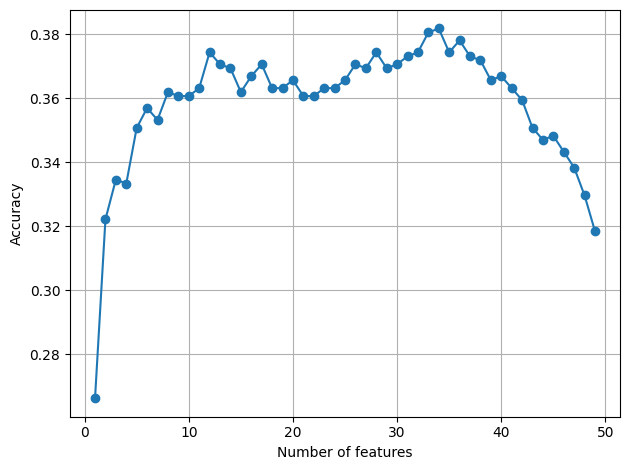

In [23]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

# selecting features
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
#plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
# plt.savefig('figures/04_09.png', dpi=300)
plt.show()

In [24]:
sbs.scores_

[0.31840796019900497,
 0.32960199004975127,
 0.3383084577114428,
 0.34328358208955223,
 0.3482587064676617,
 0.34701492537313433,
 0.35074626865671643,
 0.35945273631840796,
 0.36318407960199006,
 0.36691542288557216,
 0.3656716417910448,
 0.3718905472636816,
 0.373134328358209,
 0.3781094527363184,
 0.3743781094527363,
 0.3818407960199005,
 0.3805970149253731,
 0.3743781094527363,
 0.373134328358209,
 0.3706467661691542,
 0.3694029850746269,
 0.3743781094527363,
 0.3694029850746269,
 0.3706467661691542,
 0.3656716417910448,
 0.36318407960199006,
 0.36318407960199006,
 0.36069651741293535,
 0.36069651741293535,
 0.3656716417910448,
 0.36318407960199006,
 0.36318407960199006,
 0.3706467661691542,
 0.36691542288557216,
 0.3619402985074627,
 0.3694029850746269,
 0.3706467661691542,
 0.3743781094527363,
 0.36318407960199006,
 0.36069651741293535,
 0.36069651741293535,
 0.3619402985074627,
 0.35323383084577115,
 0.35696517412935325,
 0.35074626865671643,
 0.3333333333333333,
 0.334577114427

 1) Weight                         0.027864
 2) USG%                           0.027169
 3) WS/40                          0.026356
 4) DBPM                           0.026246
 5) BPM                            0.025903
 6) TOV%                           0.025698
 7) DRB%                           0.025255
 8) PER                            0.024966
 9) OBPM                           0.024699
10) Sum_Pts                        0.024674
11) MP                             0.024571
12) TS%                            0.024093
13) eFG%                           0.023894
14) FTr                            0.023742
15) TRB%                           0.023167
16) AST%                           0.023159
17) ORB%                           0.022420
18) DRB                            0.022417
19) PF                             0.021454
20) PProd                          0.021365
21) 3PAr                           0.021335
22) PTS                            0.021310
23) WS                          

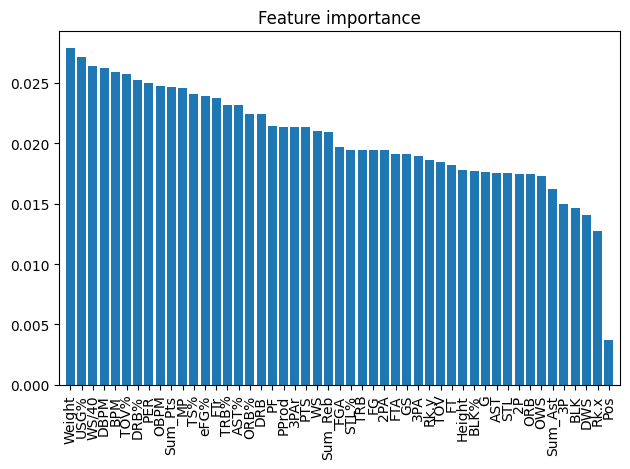

In [26]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = X.columns

forest = RandomForestClassifier(n_estimators=500,
                                random_state=1)

forest.fit(X_train_std, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train_std.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature importance')
plt.bar(range(X_train_std.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train_std.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train_std.shape[1]])
plt.tight_layout()
# plt.savefig('figures/04_10.png', dpi=300)
plt.show()

In [27]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(forest, threshold=0.01, prefit=True)
X_selected = sfm.transform(X_train_std)
print('Number of features that meet this threshold criterion:', 
      X_selected.shape[1])
for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))


Number of features that meet this threshold criterion: 48
 1) Weight                         0.027864
 2) USG%                           0.027169
 3) WS/40                          0.026356
 4) DBPM                           0.026246
 5) BPM                            0.025903
 6) TOV%                           0.025698
 7) DRB%                           0.025255
 8) PER                            0.024966
 9) OBPM                           0.024699
10) Sum_Pts                        0.024674
11) MP                             0.024571
12) TS%                            0.024093
13) eFG%                           0.023894
14) FTr                            0.023742
15) TRB%                           0.023167
16) AST%                           0.023159
17) ORB%                           0.022420
18) DRB                            0.022417
19) PF                             0.021454
20) PProd                          0.021365
21) 3PAr                           0.021335
22) PTS           